In [2]:
import os
import shutil
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow 
import keras
from collections import deque
import matplotlib.pyplot as plt
#plt.style.use("seaborn")
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping,CSVLogger
from tensorflow.keras.utils import plot_model

In [4]:
# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
 
# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20
 

DATASET_DIR = "./Complete/"
 
CLASSES_LIST = ["fight","noFight"]

In [9]:
def frames_extraction_with_optic(frames):

    # Declare a list to store video frames.
    frames_list = []
    #cap = cv2.VideoCapture(video_path)
    #ret, first_frame = cap.read()

    prev_gray = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)

    mask = np.zeros_like(frames[0])

    # Sets image saturation to maximum
    mask[..., 1] = 255
    for i in range(1,len(frames)):

        #ret, frame = cap.read()

        #if ret== False:
            #break

        gray = cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray,
                                        None,
                                        0.5, 3, 15, 3, 5, 1.2, 0)
#         flow = cv2.resize(flow,(IMAGE_HEIGHT,IMAGE_WIDTH))
#         flow = flow/255
        
        # Computes the magnitude and angle of the 2D vectors
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        mask[..., 0] = angle * 180 / np.pi / 2

        # Sets image value according to the optical flow
        # magnitude (normalized)
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

        # Converts HSV to RGB (BGR) color representation
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
        
        resized_frame = cv2.resize(rgb, (IMAGE_HEIGHT, IMAGE_WIDTH))
        fr = resized_frame/255

        frames_list.append(fr)
        
        # Updates previous frame
        prev_gray = gray

    # The following frees up resources and
    # closes all windows
    #cap.release()
    # Return the frames list.
    return frames_list

In [10]:
def frames_extraction(video_path):
 
    frames_list = []
    
    # Read the Video File
    video_reader = cv2.VideoCapture(video_path)
 
    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
 
    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
 
    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):
 
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
 
        # Reading the frame from the video. 
        success, frame = video_reader.read() 
 
        if not success:
            break
 
        # Resize the Frame to fixed height and width.
        #resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame
        #normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(frame)
    
 
    video_reader.release()
 
    return frames_list

In [18]:
def create_dataset():
 
    features = []
    labels = []
    i=0
    # Iterating through all the classes.
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        # Iterate through all the files present in the files list.
        for file_name in files_list:
            
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
 
            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)
 
            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:
                optic_frames=frames_extraction_with_optic(frames)

                # Append the data to their repective lists.
                features.append(optic_frames)
                labels.append(class_index)
                #video_files_paths.append(video_file_path)
            i=i+1
            print(f'{i}/2523 done')
 
    features = np.asarray(features)
    labels = np.array(labels)  

    return features, labels

In [19]:
# Create the dataset.
features, labels = create_dataset()

Extracting Data of Class: fight
1/2523 done
2/2523 done
3/2523 done
4/2523 done
5/2523 done
6/2523 done
7/2523 done
8/2523 done
9/2523 done
10/2523 done
11/2523 done
12/2523 done
13/2523 done
14/2523 done
15/2523 done
16/2523 done
17/2523 done
18/2523 done
19/2523 done
20/2523 done
21/2523 done
22/2523 done
23/2523 done
24/2523 done
25/2523 done
26/2523 done
27/2523 done
28/2523 done
29/2523 done
30/2523 done
31/2523 done
32/2523 done
33/2523 done
34/2523 done
35/2523 done
36/2523 done
37/2523 done
38/2523 done
39/2523 done
40/2523 done
41/2523 done
42/2523 done
43/2523 done
44/2523 done
45/2523 done
46/2523 done
47/2523 done
48/2523 done
49/2523 done
50/2523 done
51/2523 done
52/2523 done
53/2523 done
54/2523 done
55/2523 done
56/2523 done
57/2523 done
58/2523 done
59/2523 done
60/2523 done
61/2523 done
62/2523 done
63/2523 done
64/2523 done
65/2523 done
66/2523 done
67/2523 done
68/2523 done
69/2523 done
70/2523 done
71/2523 done
72/2523 done
73/2523 done
74/2523 done
75/2523 done
76

592/2523 done
593/2523 done
594/2523 done
595/2523 done
596/2523 done
597/2523 done
598/2523 done
599/2523 done
600/2523 done
601/2523 done
602/2523 done
603/2523 done
604/2523 done
605/2523 done
606/2523 done
607/2523 done
608/2523 done
609/2523 done
610/2523 done
611/2523 done
612/2523 done
613/2523 done
614/2523 done
615/2523 done
616/2523 done
617/2523 done
618/2523 done
619/2523 done
620/2523 done
621/2523 done
622/2523 done
623/2523 done
624/2523 done
625/2523 done
626/2523 done
627/2523 done
628/2523 done
629/2523 done
630/2523 done
631/2523 done
632/2523 done
633/2523 done
634/2523 done
635/2523 done
636/2523 done
637/2523 done
638/2523 done
639/2523 done
640/2523 done
641/2523 done
642/2523 done
643/2523 done
644/2523 done
645/2523 done
646/2523 done
647/2523 done
648/2523 done
649/2523 done
650/2523 done
651/2523 done
652/2523 done
653/2523 done
654/2523 done
655/2523 done
656/2523 done
657/2523 done
658/2523 done
659/2523 done
660/2523 done
661/2523 done
662/2523 done
663/25

1166/2523 done
1167/2523 done
1168/2523 done
1169/2523 done
1170/2523 done
1171/2523 done
1172/2523 done
1173/2523 done
1174/2523 done
1175/2523 done
1176/2523 done
1177/2523 done
1178/2523 done
1179/2523 done
1180/2523 done
1181/2523 done
1182/2523 done
1183/2523 done
1184/2523 done
1185/2523 done
1186/2523 done
1187/2523 done
1188/2523 done
1189/2523 done
1190/2523 done
1191/2523 done
1192/2523 done
1193/2523 done
1194/2523 done
1195/2523 done
1196/2523 done
1197/2523 done
1198/2523 done
1199/2523 done
1200/2523 done
1201/2523 done
1202/2523 done
1203/2523 done
1204/2523 done
1205/2523 done
1206/2523 done
1207/2523 done
1208/2523 done
1209/2523 done
1210/2523 done
1211/2523 done
1212/2523 done
1213/2523 done
1214/2523 done
1215/2523 done
1216/2523 done
1217/2523 done
1218/2523 done
1219/2523 done
1220/2523 done
1221/2523 done
1222/2523 done
1223/2523 done
1224/2523 done
1225/2523 done
1226/2523 done
1227/2523 done
1228/2523 done
1229/2523 done
1230/2523 done
1231/2523 done
1232/2523 

1710/2523 done
1711/2523 done
1712/2523 done
1713/2523 done
1714/2523 done
1715/2523 done
1716/2523 done
1717/2523 done
1718/2523 done
1719/2523 done
1720/2523 done
1721/2523 done
1722/2523 done
1723/2523 done
1724/2523 done
1725/2523 done
1726/2523 done
1727/2523 done
1728/2523 done
1729/2523 done
1730/2523 done
1731/2523 done
1732/2523 done
1733/2523 done
1734/2523 done
1735/2523 done
1736/2523 done
1737/2523 done
1738/2523 done
1739/2523 done
1740/2523 done
1741/2523 done
1742/2523 done
1743/2523 done
1744/2523 done
1745/2523 done
1746/2523 done
1747/2523 done
1748/2523 done
1749/2523 done
1750/2523 done
1751/2523 done
1752/2523 done
1753/2523 done
1754/2523 done
1755/2523 done
1756/2523 done
1757/2523 done
1758/2523 done
1759/2523 done
1760/2523 done
1761/2523 done
1762/2523 done
1763/2523 done
1764/2523 done
1765/2523 done
1766/2523 done
1767/2523 done
1768/2523 done
1769/2523 done
1770/2523 done
1771/2523 done
1772/2523 done
1773/2523 done
1774/2523 done
1775/2523 done
1776/2523 

2257/2523 done
2258/2523 done
2259/2523 done
2260/2523 done
2261/2523 done
2262/2523 done
2263/2523 done
2264/2523 done
2265/2523 done
2266/2523 done
2267/2523 done
2268/2523 done
2269/2523 done
2270/2523 done
2271/2523 done
2272/2523 done
2273/2523 done
2274/2523 done
2275/2523 done
2276/2523 done
2277/2523 done
2278/2523 done
2279/2523 done
2280/2523 done
2281/2523 done
2282/2523 done
2283/2523 done
2284/2523 done
2285/2523 done
2286/2523 done
2287/2523 done
2288/2523 done
2289/2523 done
2290/2523 done
2291/2523 done
2292/2523 done
2293/2523 done
2294/2523 done
2295/2523 done
2296/2523 done
2297/2523 done
2298/2523 done
2299/2523 done
2300/2523 done
2301/2523 done
2302/2523 done
2303/2523 done
2304/2523 done
2305/2523 done
2306/2523 done
2307/2523 done
2308/2523 done
2309/2523 done
2310/2523 done
2311/2523 done
2312/2523 done
2313/2523 done
2314/2523 done
2315/2523 done
2316/2523 done
2317/2523 done
2318/2523 done
2319/2523 done
2320/2523 done
2321/2523 done
2322/2523 done
2323/2523 

In [20]:
# # Saving the extracted data
# np.save("opticfeatures.npy",features)
# np.save("opticlabels.npy",labels)

In [4]:
features=np.load('../Resources/Created Data/features.npy',allow_pickle=True)
labels=np.load('../Resources/Created Data/labels.npy',allow_pickle=True)

In [5]:
features.shape

(2480, 20, 64, 64, 3)

In [6]:
# convert labels into one-hot-encoded vectors
one_hot_encoded_labels = to_categorical(labels)

In [7]:
# Split the Data into Train ( 90% ) and Test Set ( 10% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.1,
                                                                            shuffle = True, random_state = 42)

In [8]:
print(features_train.shape,labels_train.shape )
print(features_test.shape, labels_test.shape)

(2232, 20, 64, 64, 3) (2232, 2)
(248, 20, 64, 64, 3) (248, 2)


In [17]:
from keras.applications.mobilenet_v2 import MobileNetV2

mobilenet = MobileNetV2(include_top=False , weights="imagenet")

#Fine-Tuning to make the last 40 layer trainable
mobilenet.trainable=True

for layer in mobilenet.layers[:-40]:
    layer.trainable=False

#mobilenet.summary()

In [18]:
def create_model():
 
    model = Sequential()

    ########################################################################################################################
    
    #Specifying Input to match features shape
    model.add(Input(shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    # Passing mobilenet in the TimeDistributed layer to handle the sequence
    model.add(TimeDistributed(mobilenet))
    
    model.add(Dropout(0.25))
                                    
    model.add(TimeDistributed(Flatten()))

    
    lstm_fw = LSTM(units=32)
    lstm_bw = LSTM(units=32, go_backwards = True)  

    model.add(Bidirectional(lstm_fw, backward_layer = lstm_bw))
    
    model.add(Dropout(0.25))

    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.25))
    
    
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))
 
 
    model.summary()
    
    return model

In [19]:
# Constructing the Model
MoBiLSTM_model = create_model()

# Plot the structure of the contructed LRCN model.
#plot_model(MoBiLSTM_model, to_file = 'MobBiLSTM_model_structure_plot.png', show_shapes = True, show_layer_names = True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 2, 2, 1280)   2257984   
 ibuted)                                                         
                                                                 
 dropout (Dropout)           (None, 20, 2, 2, 1280)    0         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 5120)         0         
 tributed)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 64)               1319168   
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [22]:
# Create Early Stopping Callback to monitor the accuracy
early_stopping_callback = EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                  factor=0.6,
                                                  patience=5,
                                                  min_lr=0.00005,
                                                  verbose=1)
 
# Compiling the model 
MoBiLSTM_model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ["accuracy"])
 
csv_logger = CSVLogger('training.log', separator=',', append=False)
   
# Fitting the model 
MobBiLSTM_model_history = MoBiLSTM_model.fit(x = features_train, y = labels_train, epochs = 30, batch_size = 8 ,
                                             shuffle = True, validation_split = 0.2, callbacks = 
                                             [early_stopping_callback,reduce_lr,csv_logger])

Epoch 1/30
224/224 [==============================] - 426s 2s/step - loss: 0.6950 - accuracy: 0.5305 - val_loss: 0.6894 - val_accuracy: 0.5101 - lr: 0.0100
Epoch 2/30
224/224 [==============================] - 383s 2s/step - loss: 0.6872 - accuracy: 0.5557 - val_loss: 0.6736 - val_accuracy: 0.5906 - lr: 0.0100
Epoch 3/30
224/224 [==============================] - 381s 2s/step - loss: 0.6592 - accuracy: 0.6067 - val_loss: 0.5848 - val_accuracy: 0.7181 - lr: 0.0100
Epoch 4/30
224/224 [==============================] - 260s 1s/step - loss: 0.5542 - accuracy: 0.7361 - val_loss: 0.4873 - val_accuracy: 0.7785 - lr: 0.0100
Epoch 5/30
224/224 [==============================] - 254s 1s/step - loss: 0.4910 - accuracy: 0.7798 - val_loss: 0.7471 - val_accuracy: 0.6130 - lr: 0.0100
Epoch 6/30
224/224 [==============================] - 256s 1s/step - loss: 0.4409 - accuracy: 0.8140 - val_loss: 0.4668 - val_accuracy: 0.8009 - lr: 0.0100
Epoch 7/30
224/224 [==============================] - 257s 1s/st

In [9]:
from tensorflow.keras.models import load_model

In [10]:
MoBiLSTM_model=load_model('../Resources/Models/With Transfer Learning old.h5')

In [11]:
model_evaluation_history = MoBiLSTM_model.evaluate(features_test, labels_test)

8/8 [==============================] - 21s 2s/step - loss: 0.7101 - accuracy: 0.8468


In [24]:
# # Get the loss and accuracy from model_evaluation_history.
# model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

# # Define the string date format.
# # Get the current Date and Time in a DateTime Object.
# # Convert the DateTime object to string according to the style mentioned in date_time_format string.
# date_time_format = '%Y_%m_%d__%H_%M_%S'
# current_date_time_dt = dt.datetime.now()
# current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# # Define a useful name for our model to make it easy for us while navigating through multiple saved models.
# model_file_name = f'LRCN_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# # Save the Model.
# MoBiLSTM_model.save(model_file_name)

In [37]:
# import pandas as pd
# MobBiLSTM_model_history=pd.read_csv('training.log',sep=',',engine='python')

In [25]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Get the Epochs Count
    epochs = range(len(metric_value_1))
 
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'orange', label = metric_name_2)
 
    plt.title(str(plot_name))
 
    plt.legend()

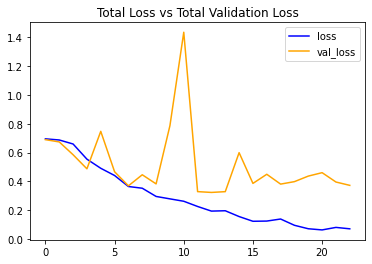

In [26]:
plot_metric(MobBiLSTM_model_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

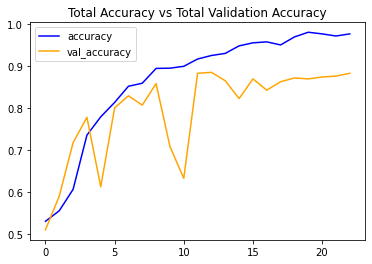

In [28]:
plot_metric(MobBiLSTM_model_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [6]:
def predict_video(video_file_path):
 
    video_reader = cv2.VideoCapture(video_file_path)
 
    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # Declare a list to store video frames we will extract.
    frames_list = []
    
    # Store the predicted class in the video.
    predicted_class_name = ''
 
    # Get the number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
 
    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)
 
    # Iterating the number of times equal to the fixed length of sequence.
    for frame_counter in range(SEQUENCE_LENGTH):
 
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
 
        success, frame = video_reader.read() 
 
        if not success:
            break
 
        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame.
        normalized_frame = resized_frame / 255
        
        # Appending the pre-processed frame into the frames list
        frames_list.append(normalized_frame)
 
    # Passing the  pre-processed frames to the model and get the predicted probabilities.
    predicted_labels_probabilities = MoBiLSTM_model.predict(np.expand_dims(frames_list, axis = 0))[0]
 
    # Get the index of class with highest probability.
    predicted_label = np.argmax(predicted_labels_probabilities)
 
    # Get the class name using the retrieved index.
    predicted_class_name = CLASSES_LIST[predicted_label]
    
    # Display the predicted class along with the prediction confidence.
    print(f'Predicted: {predicted_class_name}\nConfidence: {predicted_labels_probabilities[predicted_label]}')
        
    video_reader.release()

In [26]:
test_videos=os.listdir('../Testing')

In [34]:
for input_file in test_videos:
    path=os.path.join('..\Testing',input_file)
    print(f'Input file: {input_file}')
    predict_video(path)
    print('\n')

Input file: fight1.mp4
1/1 [==============================] - 0s 69ms/step
Predicted: fight
Confidence: 0.5976565480232239


Input file: fight2.mp4
1/1 [==============================] - 0s 73ms/step
Predicted: fight
Confidence: 0.9838602542877197


Input file: fight3.mp4
1/1 [==============================] - 0s 73ms/step
Predicted: fight
Confidence: 0.9686139822006226


Input file: fight4.mp4
1/1 [==============================] - 0s 70ms/step
Predicted: fight
Confidence: 0.5698146820068359


Input file: fight5.mp4
1/1 [==============================] - 0s 78ms/step
Predicted: fight
Confidence: 0.9023868441581726


Input file: nofight1.mp4
1/1 [==============================] - 0s 72ms/step
Predicted: noFight
Confidence: 0.9927598237991333


Input file: nofight2.mp4
1/1 [==============================] - 0s 72ms/step
Predicted: noFight
Confidence: 0.687078595161438


Input file: nofight3.mp4
1/1 [==============================] - 0s 76ms/step
Predicted: noFight
Confidence: 0.99855417

In [9]:
# Specifying video to be predicted
input_video_file_path = "../Testing/fight4.mp4"

# Perform Single Prediction on the Test Video.
predict_video(input_video_file_path)


1/1 [==============================] - 0s 125ms/step
Predicted: fight
Confidence: 0.5698146820068359


In [55]:
def realtime():    
    cap = cv2.VideoCapture(0)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))
    frames_queue=[]
    # Check if the camera is opened
    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    count=0
    predicted_labels_probabilities=[0,0]
    # Capture the frames from the camera
    while True:
        ret, frame = cap.read()
        # If the frame is not captured, break the loop
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        if count==20:
            normalized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
            normalized_frame = normalized_frame/ 255
            frames_queue.append(normalized_frame)
            count=0
        count+=1
        if len(frames_queue)==SEQUENCE_LENGTH:
            predicted_labels_probabilities = MoBiLSTM_model.predict(np.expand_dims(frames_queue, axis = 0))[0]
            # Get the index of class with highest probability.
            predicted_label = np.argmax(predicted_labels_probabilities)
            # Get the class name using the retrieved index.
            predicted_class_name = CLASSES_LIST[predicted_label]
            frames_queue=[]
        font = cv2.FONT_HERSHEY_SIMPLEX
        text = f'fight: {float(predicted_labels_probabilities[0])*100} %'
        org = (50, 50)
        fontScale = 1
        color = (0, 0, 255)
        thickness = 2
        cv2.putText(frame, text, org, font, fontScale, color, thickness, cv2.LINE_AA)

        font = cv2.FONT_HERSHEY_SIMPLEX
        text = f'nofight: {float(predicted_labels_probabilities[1])*100} %'
        org = (50, 100)
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2
        cv2.putText(frame, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
        cv2.imshow('frame', frame)

        # Wait for the user to press 'q' key to exit
        if cv2.waitKey(1) == ord('q'):
            break

    # Release the camera
    cap.release()
    out.release()
    # Close all the windows
    cv2.destroyAllWindows()

In [56]:
realtime()

1/1 [==============================] - 0s 95ms/step
